In [4]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

# Importing necessary libraries for data analysis, visualization, and modeling


In [6]:

# Loading training data from a CSV file into a pandas DataFrame and displaying the first few rows
train_data = pd.read_csv("train.csv")
print(train_data.head())

# Loading test data from a CSV file into a pandas DataFrame and displaying the first few rows
test_data = pd.read_csv("test.csv")
print(test_data.head())

# Reading and displaying the first few rows of the training and test datasets

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

# Extracting PassengerId column from the test data to be used later for predictions


In [8]:
test_passenger_ids = test_data["PassengerId"]

In [9]:
# Generating descriptive statistics for the training data and storing them in 'x'
x = train_data.describe()
print(x)

# Generating descriptive statistics for the test data and storing them in 'y'
y = test_data.describe()
print(y)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

# Exploratory Data Analysis (EDA) and Data Cleaning function

In [12]:

# Exploratory Data Analysis (EDA) and Data Cleaning function
def explore_data(data):
    # Displaying general information about the dataset
    print("Data Info:")
    print(data.info())

    # Checking for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Displaying summary statistics
    print("\nSummary Statistics:")
    print(data.describe())

    # Distribution of survival
    print("\nSurvival Distribution:")
    print(data['Survived'].value_counts())

    # Correlation matrix
    print("\nCorrelation Matrix:")
    corr_matrix = data.corr()
    print(corr_matrix)
    corr_matrix["Survived"].sort_values(ascending=False)
    # Visualizing correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    
    # Creating scatter matrix for selected attributes
    attribute = ["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
    scatter_matrix(data[attribute], figsize=(12, 8))

    # Displaying plots
    plt.show()




# Exploratory Data Analysis (EDA) and Data Cleaning function for test set


In [13]:

# Exploratory Data Analysis (EDA) and Data Cleaning function for test set
def explore_data_for_test_set(data):
    # Displaying general information about the dataset
    print("Data Info:")
    print(data.info())

    # Checking for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Displaying summary statistics
    print("\nSummary Statistics:")
    print(data.describe())

    # Correlation matrix
    print("\nCorrelation Matrix:")
    corr_matrix = data.corr()
    print(corr_matrix)
    
    # Visualizing correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    
    # Creating scatter matrix for selected attributes
    attribute = ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]
    scatter_matrix(data[attribute], figsize=(12, 8))

    # Displaying plots
    plt.show()

# Function to clean and preprocess the data

In [14]:
def clean_data(data):
    # Drop unnecessary columns
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    # Fill missing values
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    
    # Encode categorical variables
    label_encoder = preprocessing.LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

    return data

# Explore and clean training data

Training Data Exploration:
Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8 non-null      float64
 1   Survived     8 non-null      float64
 2   Pclass       8 non-null      float64
 3   Age          8 non-null      float64
 4   SibSp        8 non-null      float64
 5   Parch        8 non-null      float64
 6   Fare         8 non-null      float64
dtypes: float64(7)
memory usage: 512.0+ bytes
None

Missing Values:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count     8.000000    8.000000    8.000000    8.000000    8.000000   
mean    478.044230  111.733804  113.268089  115.596327  112.703219   
std     320.815971  314.871366  314.252344  242.9056

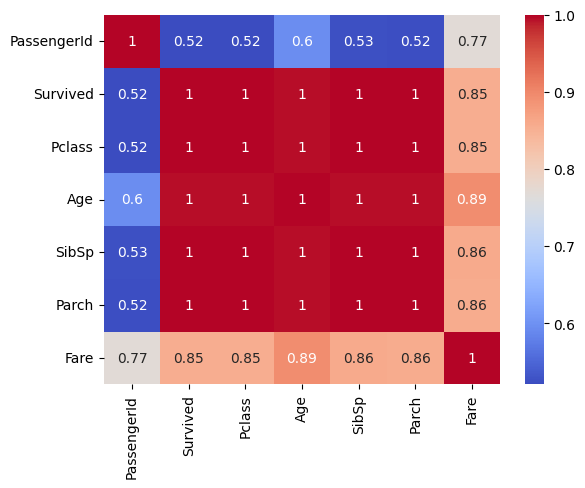

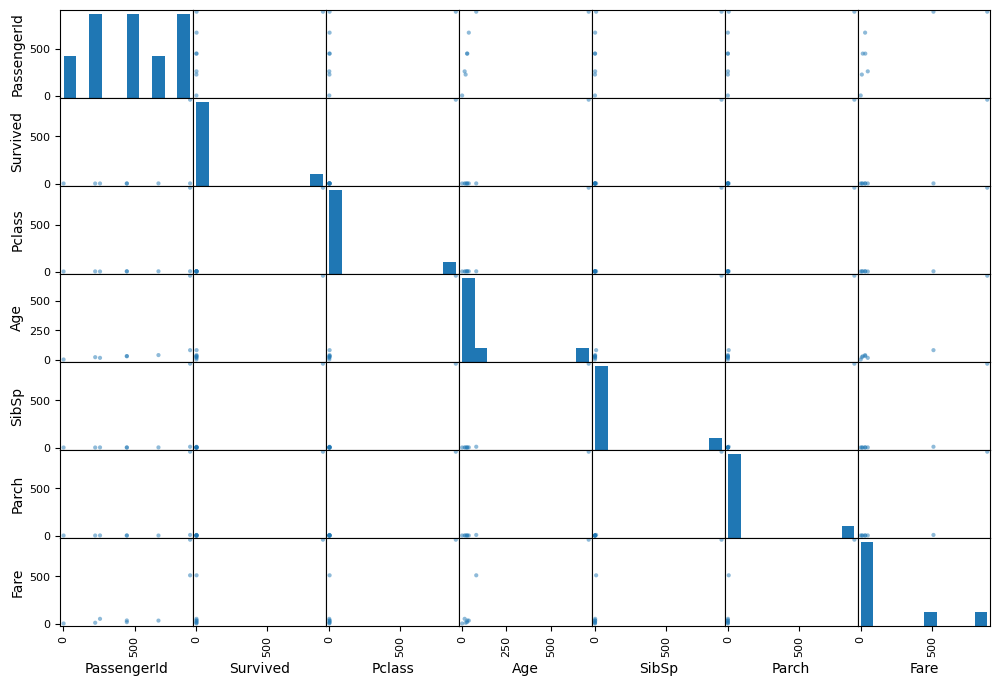

In [17]:

print("Training Data Exploration:")
explore_data(x)
train_data = clean_data(train_data)

# EDA with combined attributes

In [20]:
# Feature Engineering
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


In [21]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,1,34.5,0,0,7.8292,1,1
1,3,0,47.0,1,0,7.0000,2,2
2,2,1,62.0,0,0,9.6875,1,1
3,3,1,27.0,0,0,8.6625,2,1
4,3,0,22.0,1,1,12.2875,2,3


In [22]:
# Compute correlation matrix for training data
corr_matrix = train_data.corr()

# Display correlation matrix
print(corr_matrix)


            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.338481 -0.543351 -0.064910 -0.035322  0.081629   
Pclass     -0.338481  1.000000  0.131900 -0.339898  0.083081  0.018443   
Sex        -0.543351  0.131900  1.000000  0.081163 -0.114631 -0.245489   
Age        -0.064910 -0.339898  0.081163  1.000000 -0.233296 -0.172482   
SibSp      -0.035322  0.083081 -0.114631 -0.233296  1.000000  0.414838   
Parch       0.081629  0.018443 -0.245489 -0.172482  0.414838  1.000000   
Fare        0.257307 -0.549500 -0.182333  0.096688  0.159651  0.216225   
Embarked   -0.167675  0.162098  0.108262 -0.018754  0.068230  0.039798   
FamilySize  0.016639  0.065997 -0.200988 -0.245619  0.890712  0.783111   

                Fare  Embarked  FamilySize  
Survived    0.257307 -0.167675    0.016639  
Pclass     -0.549500  0.162098    0.065997  
Sex        -0.182333  0.108262   -0.200988  
Age         0.096688 -0.018754   -0.245619  
SibSp       0.159651  0.068230    

In [23]:
# Sort correlation of each feature with "Survived" in descending order
corr_sorted = corr_matrix["Survived"].sort_values(ascending=False)

# Print the sorted correlation values
print(corr_sorted)


Survived      1.000000
Fare          0.257307
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
Age          -0.064910
Embarked     -0.167675
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64


# Define features and target variable